#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0824 16:40:19.141147  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0824 16:40:32.180270  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 16:40:32.184259  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
model.add(Dropout(rate=0.25))

W0824 16:40:32.891369  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0824 16:40:32.904334  4268 deprecation.py:506] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0824 16:40:34.071213  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [21]:
model.compile(loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])

W0824 16:42:35.193970  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0824 16:42:35.220900  4268 deprecation_wrapper.py:119] From C:\Users\sam0522\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0824 16:42:35.228880  4268 deprecation.py:323] From C:\Users\sam0522\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)    

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 191s 5ms/step - loss: 0.3099 - acc: 0.9001 - val_loss: 0.2971 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 186s 5ms/step - loss: 0.2850 - acc: 0.9009 - val_loss: 0.2830 - val_acc: 0.9003
Epoch 3/10
40000/40000 [==============================] - 182s 5ms/step - loss: 0.2701 - acc: 0.9025 - val_loss: 0.2706 - val_acc: 0.9006
Epoch 4/10
40000/40000 [==============================] - 175s 4ms/step - loss: 0.2564 - acc: 0.9049 - val_loss: 0.2587 - val_acc: 0.9014
Epoch 5/10
40000/40000 [==============================] - 176s 4ms/step - loss: 0.2462 - acc: 0.9070 - val_loss: 0.2498 - val_acc: 0.9028
Epoch 6/10
40000/40000 [==============================] - 175s 4ms/step - loss: 0.2385 - acc: 0.9090 - val_loss: 0.2436 - val_acc: 0.9043
Epoch 7/10
40000/40000 [==============================] - 175s 4ms/step - loss: 0.2312 - acc: 0.9109 - val_loss: 0.2378 - 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

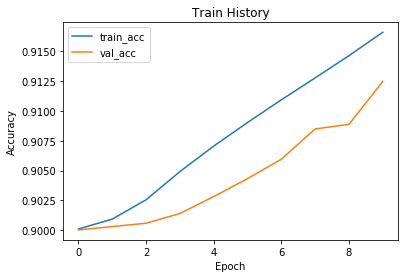

In [24]:
show_train_history('acc','val_acc')

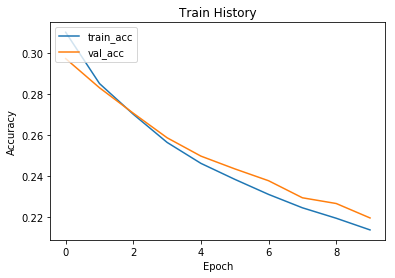

In [25]:
show_train_history('loss','val_loss')

In [27]:
model.compile(loss='mean_squared_error',optimizer='sgd', metrics=['accuracy'])

In [28]:
train_histor2=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)  

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 172s 4ms/step - loss: 0.0618 - acc: 0.5193 - val_loss: 0.0636 - val_acc: 0.5424
Epoch 2/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.0613 - acc: 0.5252 - val_loss: 0.0628 - val_acc: 0.5512
Epoch 3/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.0608 - acc: 0.5292 - val_loss: 0.0629 - val_acc: 0.5445
Epoch 4/10
40000/40000 [==============================] - 171s 4ms/step - loss: 0.0603 - acc: 0.5343 - val_loss: 0.0625 - val_acc: 0.5511
Epoch 5/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.0601 - acc: 0.5346 - val_loss: 0.0622 - val_acc: 0.5577
Epoch 6/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.0597 - acc: 0.5422 - val_loss: 0.0617 - val_acc: 0.5583
Epoch 7/10
40000/40000 [==============================] - 174s 4ms/step - loss: 0.0592 - acc: 0.5454 - val_loss: 0.0613 - 

In [34]:
def show_train_history2(train_acc,test_acc):
    plt.plot(train_histor2.history[train_acc])
    plt.plot(train_histor2.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

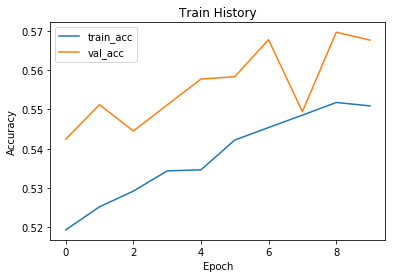

In [35]:
show_train_history2('acc','val_acc')

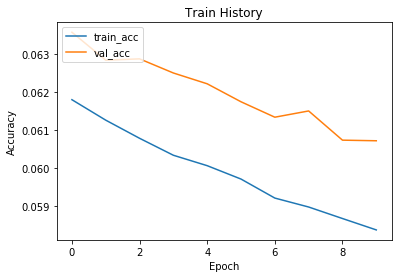

In [36]:
show_train_history2('loss','val_loss')